In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#Training a Decision tree classifier on iris Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris(as_frame=True)
X_iris=iris.data[["petal length (cm)","petal width (cm)"]].values
y_iris=iris.target

In [ ]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
tree_clf=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
tree_clf.tree_.threshold           # thresholds == conditions

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

#Visualizing the trained decision tree using export_graphviz()

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)","petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

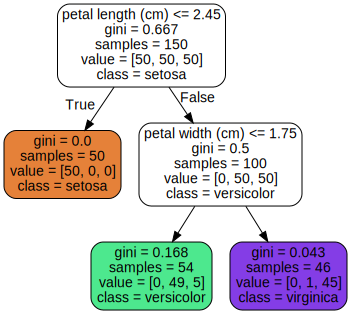

In [ ]:
from graphviz import Source

Source.from_file("iris_tree.dot")

#Making Predictions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.figure(figsize=(8,4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))

<Figure size 800x400 with 0 Axes>

In [ ]:
lengths.size

10000

In [ ]:
widths.size

10000

In [ ]:
widths[1,2]

0.030303030303030304

In [ ]:
X_iris_all=np.c_[lengths.ravel(),widths.ravel()]
y_pred=tree_clf.predict(X_iris_all).reshape(lengths.shape)

In [ ]:
X_iris_all.size

20000

In [ ]:
y_pred.size

10000

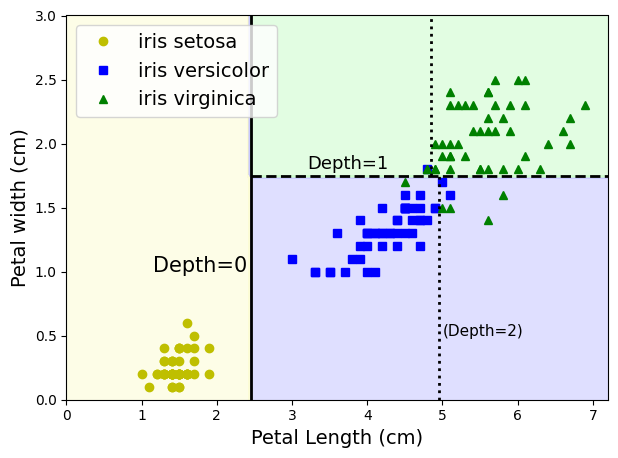

In [ ]:
plt.contourf(lengths,widths,y_pred,alpha=0.3,cmap=custom_cmap)
for idx,(name,style) in enumerate(zip(iris.target_names,("yo","bs","g^"))):
  plt.plot(X_iris[:,0][y_iris==idx],X_iris[:,1][y_iris==idx],style,label=f"iris {name}")

tree_clf_deeper=DecisionTreeClassifier(max_depth=3,random_state=42)
tree_clf_deeper.fit(X_iris,y_iris)
th0,th1,th2a,th2b=tree_clf_deeper.tree_.threshold[[0,2,3,6]]
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0,th0],[0,3],"k-",linewidth=2)
plt.plot([th0,7.2],[th1,th1],"k--",linewidth=2)
plt.plot([th2a,th2a],[0,th1],"k:",linewidth=2)
plt.plot([th2b,th2b],[th1,3],"k:",linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0,7.2,0,3])
plt.legend()
save_fig("decision_tree_decision_boundaries_plot")

plt.show()

In [ ]:
tree_clf_deeper.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      ,  4.95000005, -2.        ,
       -2.        ,  4.85000014, -2.        , -2.        ])

#Estimating Class Probabilities

In [ ]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [ ]:
tree_clf.predict([[5,1.5]])

array([1])

# The CART Training Algorithm (Classification and Regression Tree)

# Reguralizing Hyperparameters

In [ ]:
from sklearn.datasets import make_moons

X_moons,y_moons=make_moons(n_samples=150,noise=0.2,random_state=42)

##Without Reguralization

In [ ]:
tree_clf1=DecisionTreeClassifier(random_state=42)
tree_clf1.fit(X_moons,y_moons)

DecisionTreeClassifier(random_state=42)

##With Reguralization

In [ ]:
tree_clf2=DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_clf2.fit(X_moons,y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

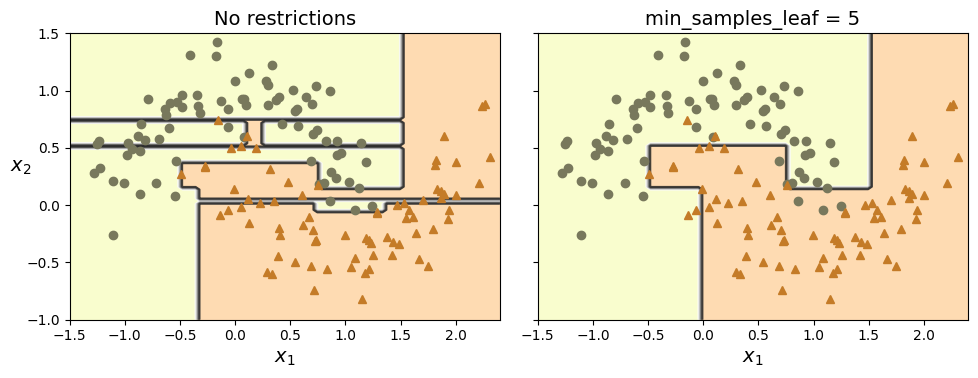

In [ ]:

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
save_fig("min_samples_leaf_plot")
plt.show()

In [ ]:
X_moons_test,y_moons_test=make_moons(n_samples=1000,noise=0.2,random_state=42)

In [ ]:
tree_clf1.score(X_moons_test,y_moons_test)

0.901

In [ ]:
tree_clf2.score(X_moons_test,y_moons_test)

0.918

#Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
export_graphviz(
    tree_reg,
    out_file=str(IMAGES_PATH / "reg_tree.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

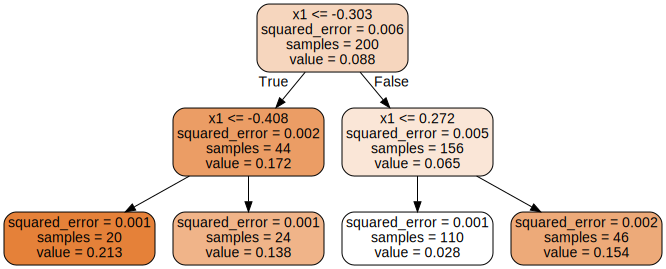

In [ ]:
Source.from_file(IMAGES_PATH / "reg_tree.dot")

In [ ]:
tree_reg2=DecisionTreeRegressor(max_depth=3,random_state=42)
tree_reg2.fit(X_quad,y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
export_graphviz(
    tree_reg2,
    out_file=str(IMAGES_PATH / "reg_tree2.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

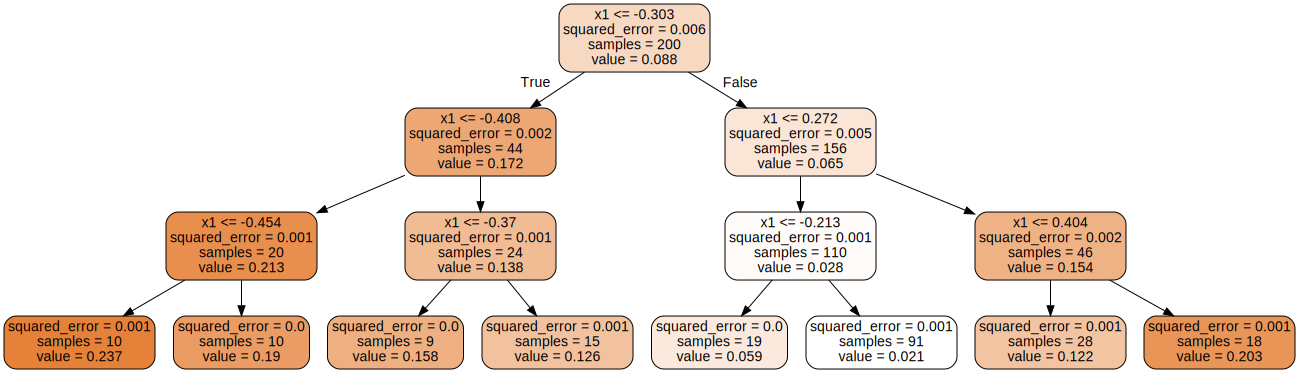

In [ ]:
Source.from_file(IMAGES_PATH / "reg_tree2.dot")

In [ ]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [ ]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

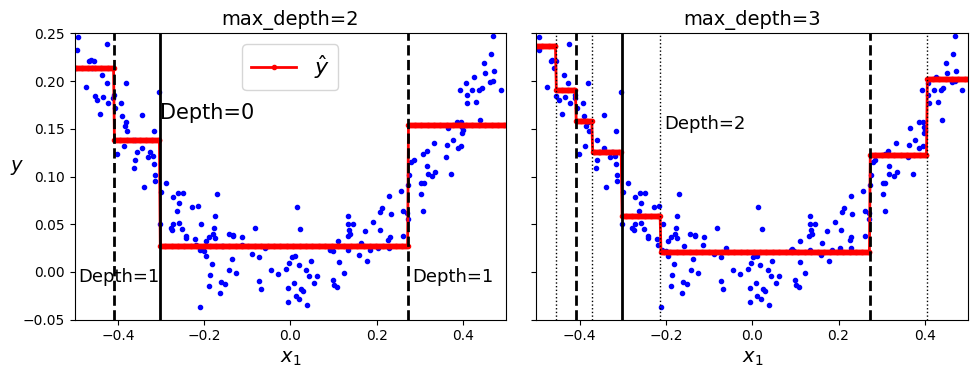

In [ ]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

save_fig("tree_regression_plot")
plt.show()

In [ ]:
tree_reg1=DecisionTreeRegressor(random_state=42)
tree_reg2=DecisionTreeRegressor(min_samples_leaf=10,random_state=42)

In [ ]:
tree_reg1.fit(X_quad,y_quad)

DecisionTreeRegressor(random_state=42)

In [ ]:
tree_reg2.fit(X_quad,y_quad)

DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

In [ ]:
export_graphviz(
    tree_reg2,
    out_file=str(IMAGES_PATH / "reg2.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

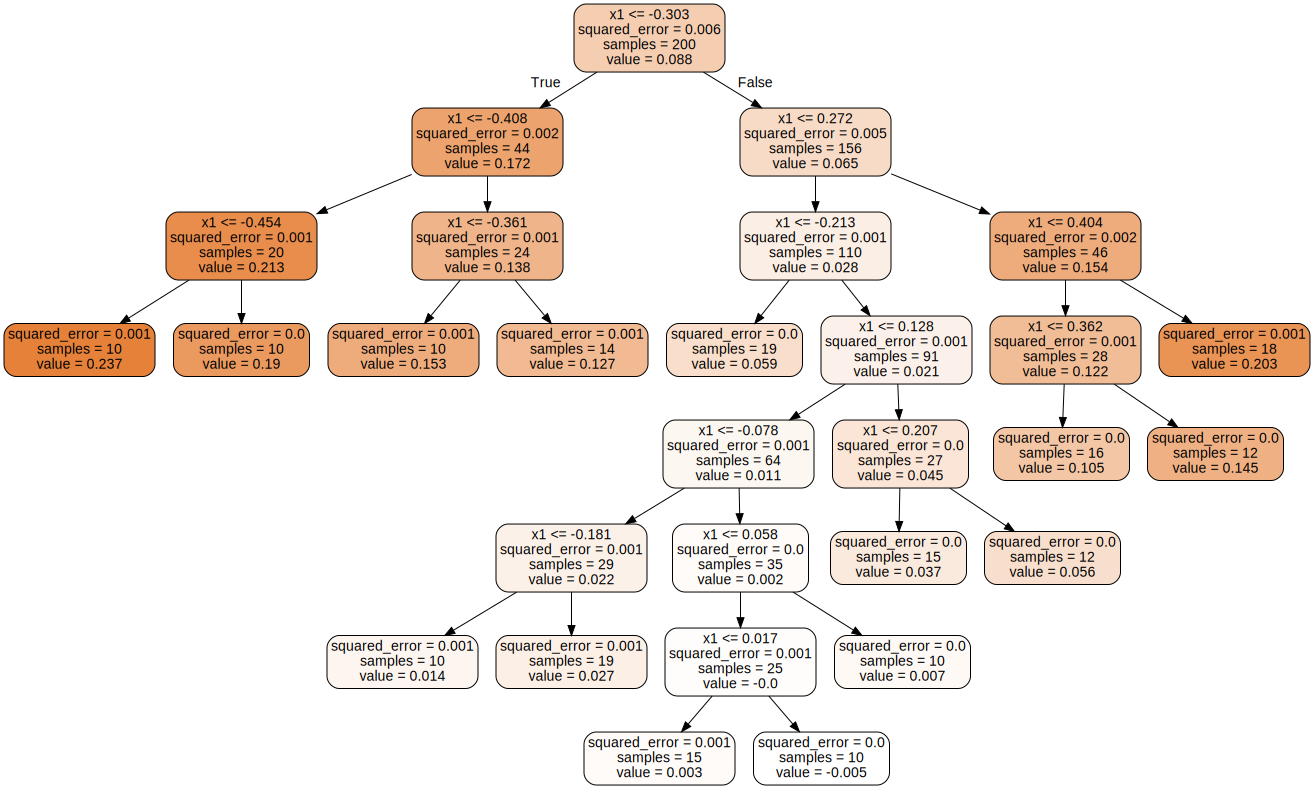

In [ ]:
Source.from_file(IMAGES_PATH / "reg2.dot")

In [ ]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.3614926 , -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        ,  0.12780198, -0.07774061, -0.18060823, -2.        ,
       -2.        ,  0.058239  ,  0.01651253, -2.        , -2.        ,
       -2.        ,  0.20746496, -2.        , -2.        ,  0.40399227,
        0.361917  , -2.        , -2.        , -2.        ])

In [ ]:
export_graphviz(
    tree_reg1,
    out_file=str(IMAGES_PATH / "reg1.dot"),
    feature_names=["x1"],
    rounded=True,
    filled=True
)

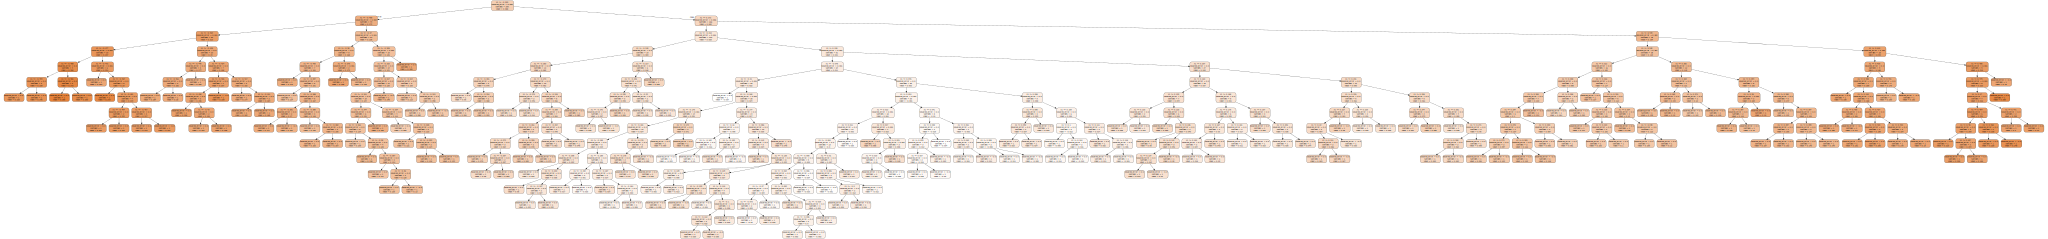

In [ ]:
Source.from_file(IMAGES_PATH / "reg1.dot")

In [ ]:
tree_reg1.tree_.threshold.size

399

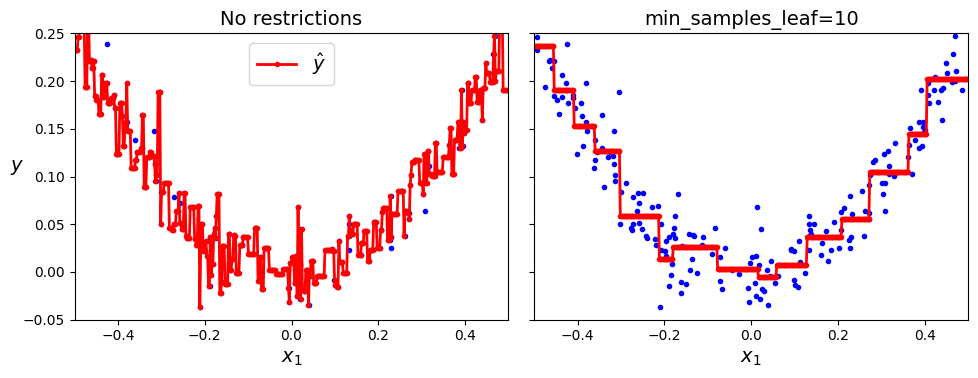

In [ ]:
x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

save_fig("tree_regression_regularization_plot")
plt.show()

#Limitation

#Sensitive to Axis Orientation

Rotating the dataset also leads to completely different decision boundaries:

In [ ]:
np.random.seed(6)
X_square=np.random.rand(100,2)-0.5
y_square=(X_square[:,0]>0).astype(np.int64)

In [ ]:
X_square[:10]

array([[ 0.39286015, -0.16802019],
       [ 0.32122912, -0.45830337],
       [-0.39234332,  0.09505206],
       [ 0.02981736, -0.08119257],
       [-0.16459215,  0.12251943],
       [-0.06185857,  0.23588211],
       [ 0.01803641,  0.0788586 ],
       [ 0.1453551 ,  0.49022427],
       [ 0.3198582 , -0.08679907],
       [ 0.37626766,  0.32375943]])

In [ ]:
y_square

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
angle=np.pi/4    # 45 degree
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square=X_square.dot(rotation_matrix)

In [ ]:
tree_clf_square=DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square,y_square)

DecisionTreeClassifier(random_state=42)

In [ ]:
tree_clf_square.tree_.threshold   # depth=1  (1 condition)

array([-0.00614993, -2.        , -2.        ])

In [ ]:
tree_clf_rotated_square=DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square,y_square)

DecisionTreeClassifier(random_state=42)

In [ ]:
tree_clf_rotated_square.tree_.threshold        # depth=5 (5 conditions)

array([ 0.12516001, -0.2623029 , -2.        ,  0.05078658, -0.11365169,
       -2.        , -2.        , -2.        ,  0.34573244, -2.        ,
       -2.        ])

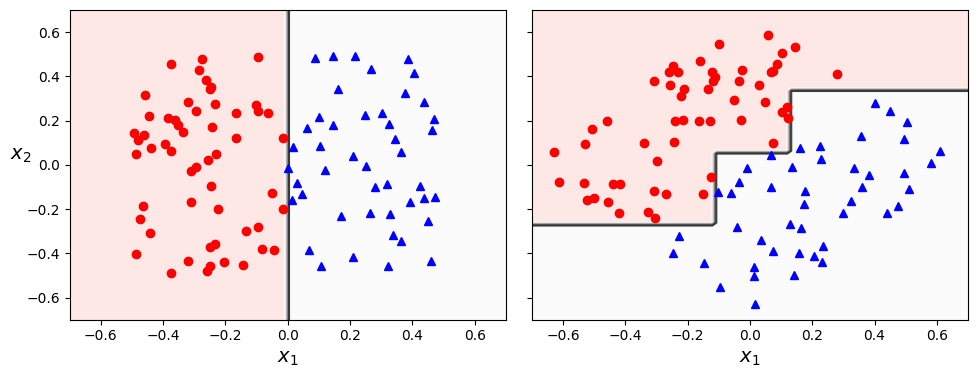

In [ ]:
fig,axes=plt.subplots(ncols=2,figsize=(10,4),sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf_square,X_square,y_square,axes=[-0.7,0.7,-0.7,0.7],cmap="Pastel1")

plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square,X_rotated_square,y_square,axes=[-0.7,0.7,-0.7,0.7],cmap="Pastel1")
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

# One Way to solve this problem is to scale the data then apply Principal component analysis(PCA)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline=make_pipeline(StandardScaler(),PCA())
X_iris_rotated=pca_pipeline.fit_transform(X_iris)
tree_clf_pca=DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf_pca.fit(X_iris_rotated,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
X_iris[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [ ]:
X_iris_rotated[:5]

array([[-1.87784285,  0.01752368],
       [-1.87784285,  0.01752368],
       [-1.91803298,  0.05771381],
       [-1.83765272, -0.02266645],
       [-1.87784285,  0.01752368]])

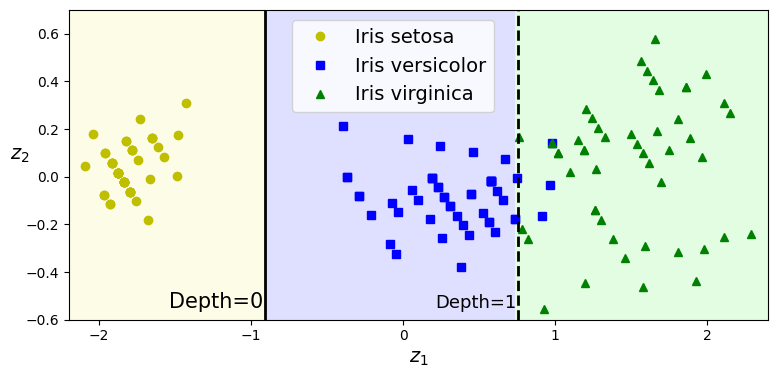

In [ ]:
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0",
         horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1",
         horizontalalignment="right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
save_fig("pca_preprocessing_plot")

plt.show()

In [ ]:
tree_clf_pca.tree_.threshold      # 2 conditions

array([-0.9111246 , -2.        ,  0.75787246, -2.        , -2.        ])

# Another Limitation is Decision Trees Have a High Variance

We've seen that small changes in the dataset (such as a rotation) may produce a very different Decision Tree.

Now let's show that training the same model on the same data may produce a very different model every time, since the CART training algorithm used by Scikit-Learn is stochastic. To show this, we will set random_state to a different value than earlier:

In [ ]:
tree_clf_tweaked=DecisionTreeClassifier(max_depth=2,random_state=40)       # random_state=42  (42 in entire classifiers)

In [ ]:
tree_clf_tweaked.fit(X_iris,y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

In [ ]:
tree_clf_tweaked.tree_.threshold    # different threshold compared to the first trained classifier

array([ 0.80000001, -2.        ,  1.75      , -2.        , -2.        ])

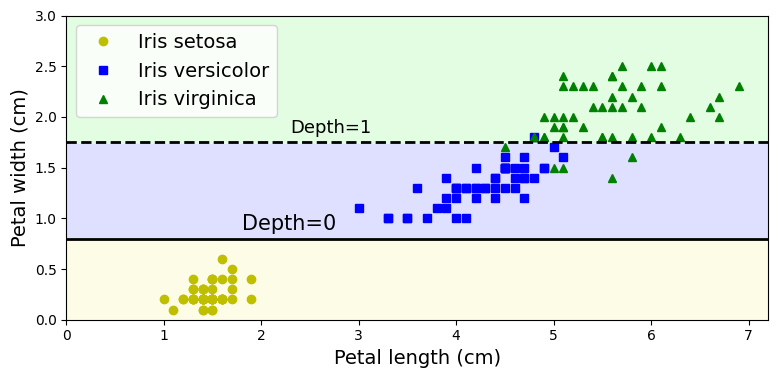

In [ ]:
plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
save_fig("decision_tree_high_variance_plot")

plt.show()

#Exercises

In [ ]:
from sklearn.datasets import make_moons

X_moons,y_moons=make_moons(n_samples=10000,noise=0.4,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_moons,y_moons,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params={
    'max_leaf_nodes':list(range(2,100)),
    'max_depth':list(range(1,7)),
    'min_samples_split':[2,3,4]
}

grid_search_cv=GridSearchCV(DecisionTreeClassifier(random_state=42),
                            params,
                            cv=3)

grid_search_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

By default, GridSearchCV trains the best model found on the whole training set (you can change this by setting refit=False), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [ ]:
y_pred=grid_search_cv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.8595

In [ ]:
len(X_train)

8000

#Training or growing a forest

Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ShuffleSplit class for this.

In [ ]:
from sklearn.model_selection import ShuffleSplit

n_trees=1000
n_instances=100

mini_sets=[]

rs=ShuffleSplit(n_splits=n_trees,test_size=len(X_train)-n_instances,random_state=42)


In [ ]:
for mini_train_index,mini_test_index in rs.split(X_train):
  X_mini_train=X_train[mini_train_index]
  y_mini_train=y_train[mini_train_index]
  mini_sets.append((X_mini_train,y_mini_train))

Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [ ]:
from sklearn.base import clone

forest=[clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores=[]


In [ ]:
forest[:5]    # 1000 decision trees with same hyperparameters

[DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42),
 DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)]

In [ ]:
for tree,(X_mini_train,y_mini_train) in zip(forest,mini_sets):
  tree.fit(X_mini_train,y_mini_train)

  y_pred=tree.predict(X_test)
  accuracy_scores.append(accuracy_score(y_pred,y_test))

In [ ]:
import numpy as np

np.mean(accuracy_scores)

0.8056605

In [ ]:
len(accuracy_scores)

1000

For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's mode() function for this). This gives you majority-vote predictions over the test set.

In [ ]:
Y_pred=np.empty([n_trees,len(X_test)],dtype=np.uint8)

In [ ]:
for tree_index,tree in enumerate(forest):
  Y_pred[tree_index]=tree.predict(X_test)

In [ ]:
from scipy.stats import mode

y_pred_majority_votes,n_votes=mode(Y_pred,axis=0)

<ipython-input-42-c95348d724ea>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_majority_votes,n_votes=mode(Y_pred,axis=0)


In [ ]:
y_pred_majority_votes

array([[1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
n_votes

array([[949, 908, 963, ..., 918, 993, 615]])

In [ ]:
accuracy_score(y_test,y_pred_majority_votes.reshape([-1]))

0.873